In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier  # sklearn.multiclass 模块通过将多分类问题化为二分类问题来处理 multiclass 和 multilabel 分类问题。

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
#导入鸢尾花的数据集，并且设定X和y，X指的是各种特征的数据，y指的是分类结果。他们均是np.array形式。

In [3]:
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
#n_classes为有几种分类，这里的n_classes为3

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,  random_state=0)
#将数据集分为训练集和测试集，比例为1：1

In [5]:
# OneVsRestClassifier用一个分类器对应一个类别， 每个分类器都把其他全部的类别作为相反类别看待。
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=0))
#设置一个svm的分类器
y_score = classifier.fit(X_train,y_train).decision_function(X_test)
#在数据集上运行，通过decision_function()计算得到的y_score的值，用在roc_curve()函数

In [6]:
# 计算ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

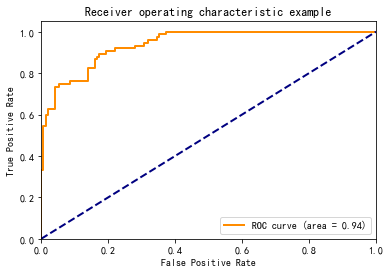

In [7]:
#显示到当前界面，保存为svm.png
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
# plt.savefig('svm.png')